In [1]:
# Importing Libraries and Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So, here we can conclude that there are no null values in the dataset given.

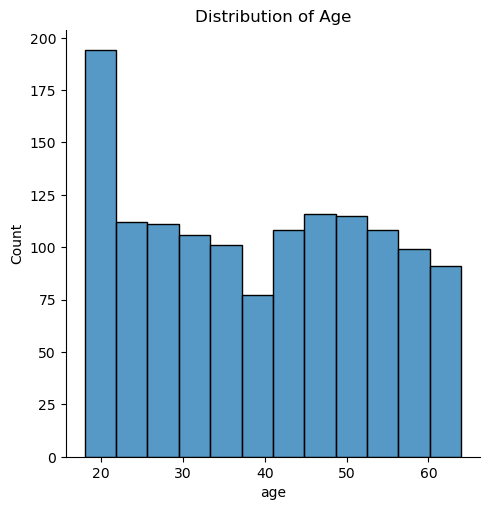

In [8]:
# Distribution of age variable
sns.displot(df['age'])
plt.title('Distribution of Age')
plt.show()

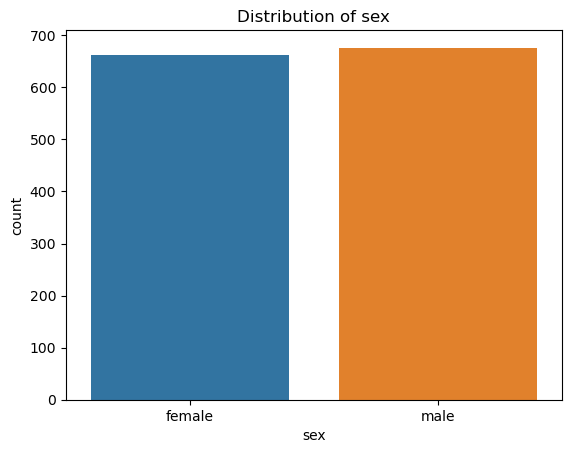

In [9]:
# Plot of sex varibles
sns.countplot(x = 'sex', data = df)
plt.title('Distribution of sex')
plt.show()

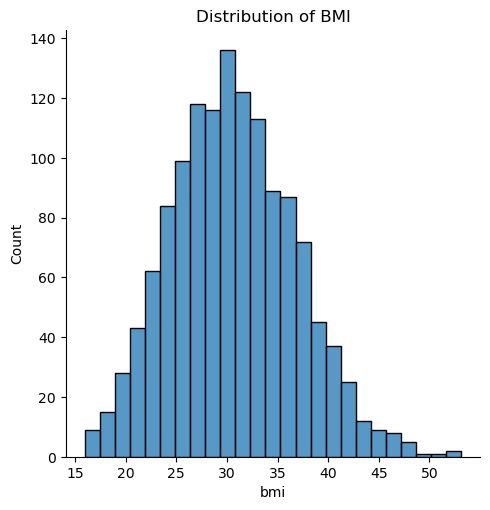

In [10]:
# Distribution of bmi variable

sns.displot(df['bmi'])
plt.title('Distribution of BMI')
plt.show()

This kind of distribution is normal distribution. The figure shows that we have an gradual increase from 15 to reach the peak values of 30. Then there is a gradual decrease. We may also notice very few outliers and we will take care of them later.

According to the research, Normal BMI range is 18.5 to 24.9. A person exceeding the limit is overweight and the person below this limit is underweight. We could see that there are more number of people in this dataset that are overweight!

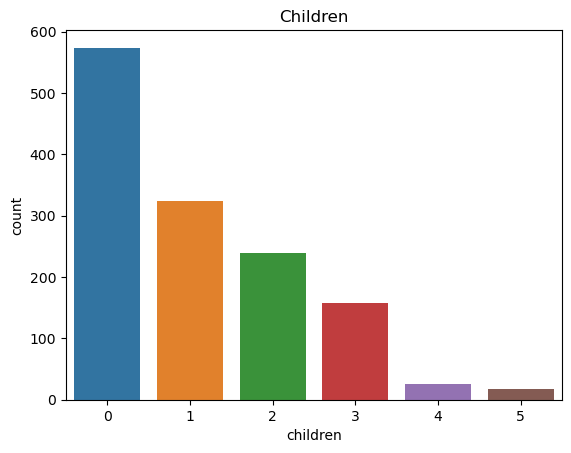

In [11]:
# Plot of Children variable
sns.countplot(x = 'children',data = df)
plt.title('Children')
plt.show()

According to the figure, there are more number of people with no children. Then there are people having 1-3 children and there are very less people having 4-5 children.

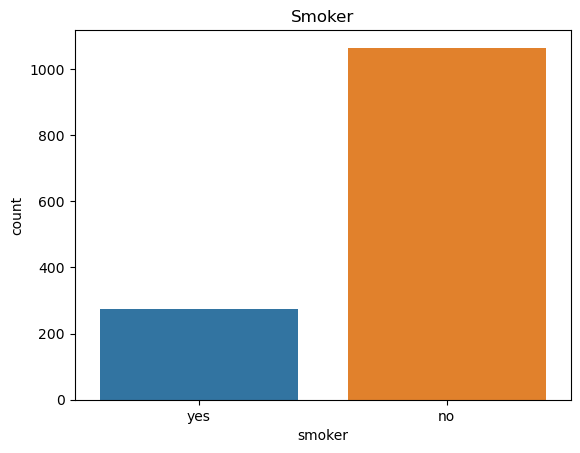

In [12]:
# Plot of smoker variable
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker')
plt.show()

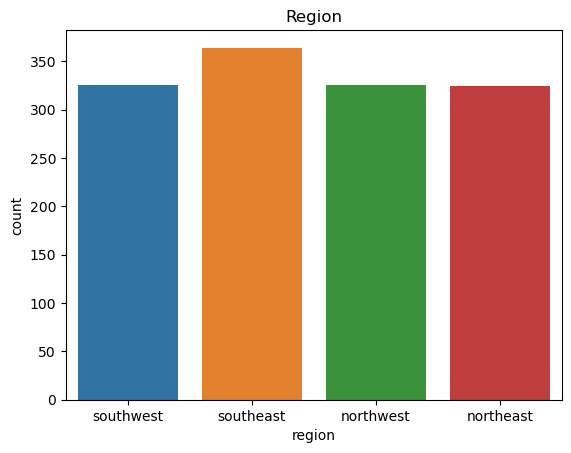

In [13]:
# Plot of region varible
sns.countplot(x = 'region', data = df)
plt.title('Region')
plt.show()

We have four regions: Southwest, Southeast, Northwest, and Northeast. People are equally distributed in all the regions with southeast having slightly more number of people than other regions.

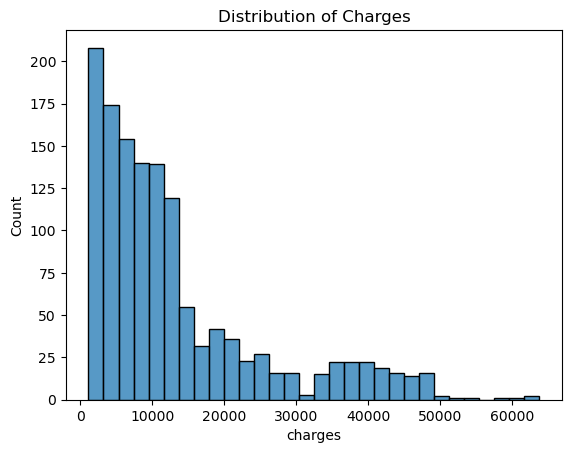

In [14]:
# Distribution of charges variable
sns.histplot(df['charges'])
plt.title('Distribution of Charges')
plt.show()

# Data Preprocessing

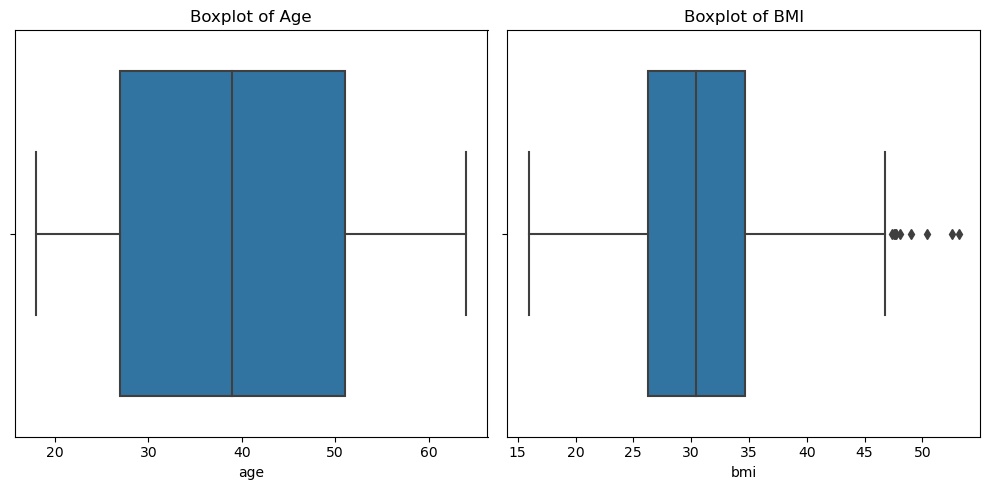

In [15]:
df.drop_duplicates(inplace = True)
# Creating subplots with two boxplots
plt.figure(figsize=(10, 5))

# Boxplot for 'age'
plt.subplot(1, 2, 1)
sns.boxplot(df['age'])
plt.title('Boxplot of Age')

# Boxplot for 'bmi'
plt.subplot(1, 2, 2)
sns.boxplot(df['bmi'])
plt.title('Boxplot of BMI')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [16]:
Q1 = df['bmi'].quantile(0.25)
Q2 = df['bmi'].quantile(0.50)
Q3 = df['bmi'].quantile(0.75)
iqr = Q3 - Q1
lowlim = Q1 - 1.5*iqr
upplim = Q3 + 1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


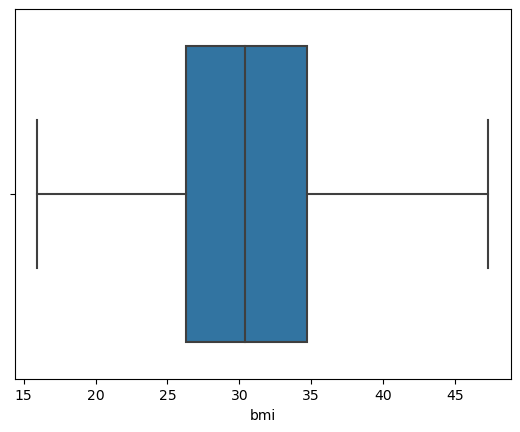

In [17]:
# Define min and max capping values
min_cap = 13.6749
max_cap = 47.315

# Cap outliers in the 'bmi' column
df['bmi'] = np.where(df['bmi'] < min_cap, min_cap, df['bmi'])
df['bmi'] = np.where(df['bmi'] > max_cap, max_cap, df['bmi'])

# Visualize the capped 'bmi' column using a boxplot
sns.boxplot(df['bmi'])
plt.show()

## Data Wrangling

In [18]:
df['bmi'].skew()

0.23289153320569975

In [19]:
df['age'].skew()

0.054780773126998195

Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

### Encoding

In [20]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [21]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


### Model Development

In [22]:
X = df.drop(['charges'], axis = 1)
Y = df[['charges']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1 = []
l2 = []
l3 = []
cvs = 0
for i in range(40, 50):
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state = i)
    lrmodel = LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs = (cross_val_score(lrmodel,X,Y,cv = 5,)).mean()
    l3.append(cvs)
    df1 = pd.DataFrame({'train acc':l1, 'test acc':l2,'cvs':l3})
    

In [23]:
df1

,train acc,test acc,cvs
0,0.741659,0.778409,0.74707
1,0.756401,0.706267,0.74707
2,0.729542,0.806239,0.74707
3,0.754260,0.732791,0.74707
4,0.742966,0.779591,0.74707
5,0.753281,0.731769,0.74707
6,0.741261,0.776456,0.74707
7,0.731940,0.796173,0.74707
8,0.751915,0.741742,0.74707
9,0.756348,0.722565,0.74707


Scores for various random_state number.
After dividing the data into training and validation data it is considered a better practice to achieve stable and fast training of the model.We have identified the best random_state number for this data set as 42 .Now we fix this random_state and try with different ml algorithms for better score or accuracy.

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
lrmodel = LinearRegression()
lrmodel.fit(xtrain, ytrain)
print("Training Score:", lrmodel.score(xtrain, ytrain))
print("Testing Score:", lrmodel.score(xtest, ytest))
print("Cross Validation Score (mean):", cross_val_score(lrmodel, X, Y, cv=5).mean())


Training Score: 0.7295415541376445
Testing Score: 0.8062391115570589
Cross Validation Score (mean): 0.7470697972809902


In [25]:
from sklearn.metrics import r2_score
svrmodel = SVR()
svrmodel.fit(xtrain, ytrain)
ypredtrain1 = svrmodel.predict(xtrain)
ypredtest1 = svrmodel.predict(xtest)
print("Training R2 Score:", r2_score(ytrain, ypredtrain1))
print("Testing R2 Score:", r2_score(ytest, ypredtest1))
print("Cross Validation R2 Score (mean):", cross_val_score(svrmodel, X, Y, cv=5).mean())


Training R2 Score: -0.10151474302536445
Testing R2 Score: -0.1344454720199666
Cross Validation R2 Score (mean): -0.10374591327267262


In [26]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Fit initial Random Forest model
rfmodel = RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain, ytrain)
ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)
print("Initial Random Forest Model:")
print("Training R2 Score:", r2_score(ytrain, ypredtrain2))
print("Testing R2 Score:", r2_score(ytest, ypredtest2))
print("Cross Validation R2 Score (mean):", cross_val_score(rfmodel, X, Y, cv=5).mean())

Initial Random Forest Model:
Training R2 Score: 0.9738163260247533
Testing R2 Score: 0.8819423353068565
Cross Validation R2 Score (mean): 0.8363637309718952


In [27]:
# Grid Search for best parameters
estimator = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [10, 40, 50, 98, 100, 120, 150]}
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'n_estimators': 120}


In [28]:
# Fit Random Forest model with best parameters
rfmodel = RandomForestRegressor(random_state=42, n_estimators=120)
rfmodel.fit(xtrain, ytrain)
ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)
print("Random Forest Model with Best Parameters:")
print("Training R2 Score:", r2_score(ytrain, ypredtrain2))
print("Testing R2 Score:", r2_score(ytest, ypredtest2))
print("Cross Validation R2 Score (mean):", cross_val_score(rfmodel, X, Y, cv=5).mean())

Random Forest Model with Best Parameters:
Training R2 Score: 0.9746383984429655
Testing R2 Score: 0.8822009842175969
Cross Validation R2 Score (mean): 0.8367438097052858


In [29]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Fit initial Gradient Boosting model
gbmodel = GradientBoostingRegressor()
gbmodel.fit(xtrain, ytrain)
ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)
print("Initial Gradient Boosting Model:")
print("Training R2 Score:", r2_score(ytrain, ypredtrain3))
print("Testing R2 Score:", r2_score(ytest, ypredtest3))
print("Cross Validation R2 Score (mean):", cross_val_score(gbmodel, X, Y, cv=5).mean())

Initial Gradient Boosting Model:
Training R2 Score: 0.893134582116604
Testing R2 Score: 0.9042742523309283
Cross Validation R2 Score (mean): 0.855387484001467


In [30]:
# Grid Search for best parameters
estimator = GradientBoostingRegressor()
param_grid = {'n_estimators': [10, 15, 19, 20, 21, 50], 'learning_rate': [0.1, 0.19, 0.2, 0.21, 0.8, 1]}
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'learning_rate': 0.2, 'n_estimators': 21}


In [31]:
# Fit Gradient Boosting model with best parameters
gbmodel = GradientBoostingRegressor(n_estimators=19, learning_rate=0.2)
gbmodel.fit(xtrain, ytrain)
ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)
print("Gradient Boosting Model with Best Parameters:")
print("Training R2 Score:", r2_score(ytrain, ypredtrain3))
print("Testing R2 Score:", r2_score(ytest, ypredtest3))
print("Cross Validation R2 Score (mean):", cross_val_score(gbmodel, X, Y, cv=5).mean())

Gradient Boosting Model with Best Parameters:
Training R2 Score: 0.8682397447116927
Testing R2 Score: 0.9017109716082662
Cross Validation R2 Score (mean): 0.8606041910125791


In [32]:
from xgboost import XGBRegressor

# Fit initial XGBoost model
xgmodel = XGBRegressor()
xgmodel.fit(xtrain, ytrain)
ypredtrain4 = xgmodel.predict(xtrain)
ypredtest4 = xgmodel.predict(xtest)
print("Initial XGBoost Model:")
print("Training R2 Score:", r2_score(ytrain, ypredtrain4))
print("Testing R2 Score:", r2_score(ytest, ypredtest4))
print("Cross Validation R2 Score (mean):", cross_val_score(xgmodel, X, Y, cv=5).mean())


Initial XGBoost Model:
Training R2 Score: 0.9944530188818493
Testing R2 Score: 0.8618686915522016
Cross Validation R2 Score (mean): 0.8104424308304893


In [33]:
# Grid Search for best parameters
from sklearn.model_selection import GridSearchCV
estimator = XGBRegressor()
param_grid = {'n_estimators': [10, 15, 20, 40, 50], 'max_depth': [3, 4, 5], 'gamma': [0, 0.15, 0.3, 0.5, 1]}
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'gamma': 0, 'max_depth': 3, 'n_estimators': 15}


In [34]:
# Fit XGBoost model with best parameters
xgmodel = XGBRegressor(n_estimators=15, max_depth=3, gamma=0)
xgmodel.fit(xtrain, ytrain)
ypredtrain4 = xgmodel.predict(xtrain)
ypredtest4 = xgmodel.predict(xtest)
print("XGBoost Model with Best Parameters:")
print("Training R2 Score:", r2_score(ytrain, ypredtrain4))
print("Testing R2 Score:", r2_score(ytest, ypredtest4))
print("Cross Validation R2 Score (mean):", cross_val_score(xgmodel, X, Y, cv=5).mean())

XGBoost Model with Best Parameters:
Training R2 Score: 0.870691899927822
Testing R2 Score: 0.904151903449132
Cross Validation R2 Score (mean): 0.8600710679082143


In [35]:
from tabulate import tabulate

# Define the algorithms and their corresponding scores
algorithms = ['Linear Regression', 'Support Vector Machine', 'Random Forest', 'Gradient Boost', 'XGBoost']
train_accuracy = [0.729, -0.105, 0.974, 0.868, None]
test_accuracy = [0.806, -0.134, 0.882, 0.901, None]
cv_score = [0.747, 0.103, 0.836, 0.860, None]

# Arrange data in tabular format
data = {'Algorithm': algorithms, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'CV Score': cv_score}

# Print the tabulated data
print(tabulate(data, headers='keys', tablefmt='github'))


| Algorithm              |   Train Accuracy |   Test Accuracy |   CV Score |
|------------------------|------------------|-----------------|------------|
| Linear Regression      |            0.729 |           0.806 |      0.747 |
| Support Vector Machine |           -0.105 |          -0.134 |      0.103 |
| Random Forest          |            0.974 |           0.882 |      0.836 |
| Gradient Boost         |            0.868 |           0.901 |      0.86  |
| XGBoost                |                  |                 |            |


From the above table we can observe that XGBoost is the best model.Now we need to identify the important features for predicting of charges.

In [36]:
feats = pd.DataFrame(data = grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.050547
sex,0.002721
bmi,0.092197
children,0.013500
smoker,0.834279
region,0.006756


In [37]:
important_features=feats[feats['Importance']>0.01]
important_features


,Importance
age,0.050547
bmi,0.092197
children,0.013500
smoker,0.834279


In [38]:
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print('Train accuracy:', r2_score(ytrain,ypredtrain4))
print('Test accuracy:', r2_score(ytest,ypredtest4))
print('CV Score:', cross_val_score(finalmodel,X,Y,cv=5,).mean())


Train accuracy: 0.8685330377072453
Test accuracy: 0.9019690386148037
CV Score: 0.8596087656497564


In [39]:
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))


In [40]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)


array([17483.12], dtype=float32)

## Conclusion
Out of all the models XGBoost model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.